In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from collections import defaultdict

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

In [26]:
# 数据集路径配置
dataset_dir = r"D:\桌面\capstone\test2\DermNet"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

print("=== DermNet 数据集概览 ===")
print(f"数据集根目录: {dataset_dir}")
print(f"训练集目录: {train_dir}")
print(f"测试集目录: {test_dir}")
print(f"数据集根目录存在: {os.path.exists(dataset_dir)}")
print(f"训练集目录存在: {os.path.exists(train_dir)}")
print(f"测试集目录存在: {os.path.exists(test_dir)}")

=== DermNet 数据集概览 ===
数据集根目录: D:\桌面\capstone\test2\DermNet
训练集目录: D:\桌面\capstone\test2\DermNet\train
测试集目录: D:\桌面\capstone\test2\DermNet\test
数据集根目录存在: True
训练集目录存在: True
测试集目录存在: True


In [27]:
def analyze_dataset_structure(data_dir, dataset_type=""):
    """分析数据集结构，返回类别和每个类别的图片数量"""
    if not os.path.exists(data_dir):
        print(f"错误：目录 {data_dir} 不存在")
        return {}, 0
    
    categories = []
    category_counts = {}
    total_images = 0
    
    # 获取所有类别文件夹
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            categories.append(category)
            
            # 统计该类别下的图片数量
            image_files = [f for f in os.listdir(category_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'))]
            category_counts[category] = len(image_files)
            total_images += len(image_files)
    
    print(f"\n=== {dataset_type} 数据集分析 ===")
    print(f"类别总数: {len(categories)}")
    print(f"图片总数: {total_images}")
    print(f"平均每类图片数: {total_images/len(categories):.1f}" if categories else "0")
    
    return category_counts, total_images

# 分析训练集
train_category_counts, train_total = analyze_dataset_structure(train_dir, "训练集")

# 分析测试集
test_category_counts, test_total = analyze_dataset_structure(test_dir, "测试集")


=== 训练集 数据集分析 ===
类别总数: 23
图片总数: 15557
平均每类图片数: 676.4

=== 测试集 数据集分析 ===
类别总数: 23
图片总数: 4002
平均每类图片数: 174.0


In [28]:
# 显示所有类别的详细信息
print("\n=== 详细类别信息 ===")
if train_category_counts:
    categories = list(train_category_counts.keys())
    print(f"数据集包含 {len(categories)} 个皮肤病类别：")
    print("\n类别列表：")
    for i, category in enumerate(sorted(categories), 1):
        train_count = train_category_counts.get(category, 0)
        test_count = test_category_counts.get(category, 0)
        total_count = train_count + test_count
        print(f"{i:2d}. {category}")
        print(f"    训练集: {train_count:4d} 张, 测试集: {test_count:4d} 张, 总计: {total_count:4d} 张")

print(f"\n=== 数据集总计 ===")
print(f"训练集总图片数: {train_total:,}")
print(f"测试集总图片数: {test_total:,}")
print(f"数据集总图片数: {train_total + test_total:,}")
print(f"类别总数: {len(categories) if 'categories' in locals() else 0}")


=== 详细类别信息 ===
数据集包含 23 个皮肤病类别：

类别列表：
 1. Acne and Rosacea Photos
    训练集:  840 张, 测试集:  312 张, 总计: 1152 张
 2. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
    训练集: 1149 张, 测试集:  288 张, 总计: 1437 张
 3. Atopic Dermatitis Photos
    训练集:  489 张, 测试集:  123 张, 总计:  612 张
 4. Bullous Disease Photos
    训练集:  448 张, 测试集:  113 张, 总计:  561 张
 5. Cellulitis Impetigo and other Bacterial Infections
    训练集:  288 张, 测试集:   73 张, 总计:  361 张
 6. Eczema Photos
    训练集: 1235 张, 测试集:  309 张, 总计: 1544 张
 7. Exanthems and Drug Eruptions
    训练集:  404 张, 测试集:  101 张, 总计:  505 张
 8. Hair Loss Photos Alopecia and other Hair Diseases
    训练集:  239 张, 测试集:   60 张, 总计:  299 张
 9. Herpes HPV and other STDs Photos
    训练集:  405 张, 测试集:  102 张, 总计:  507 张
10. Light Diseases and Disorders of Pigmentation
    训练集:  568 张, 测试集:  143 张, 总计:  711 张
11. Lupus and other Connective Tissue diseases
    训练集:  420 张, 测试集:  105 张, 总计:  525 张
12. Melanoma Skin Cancer Nevi and Moles
    训练集:  463 张, 测试集:

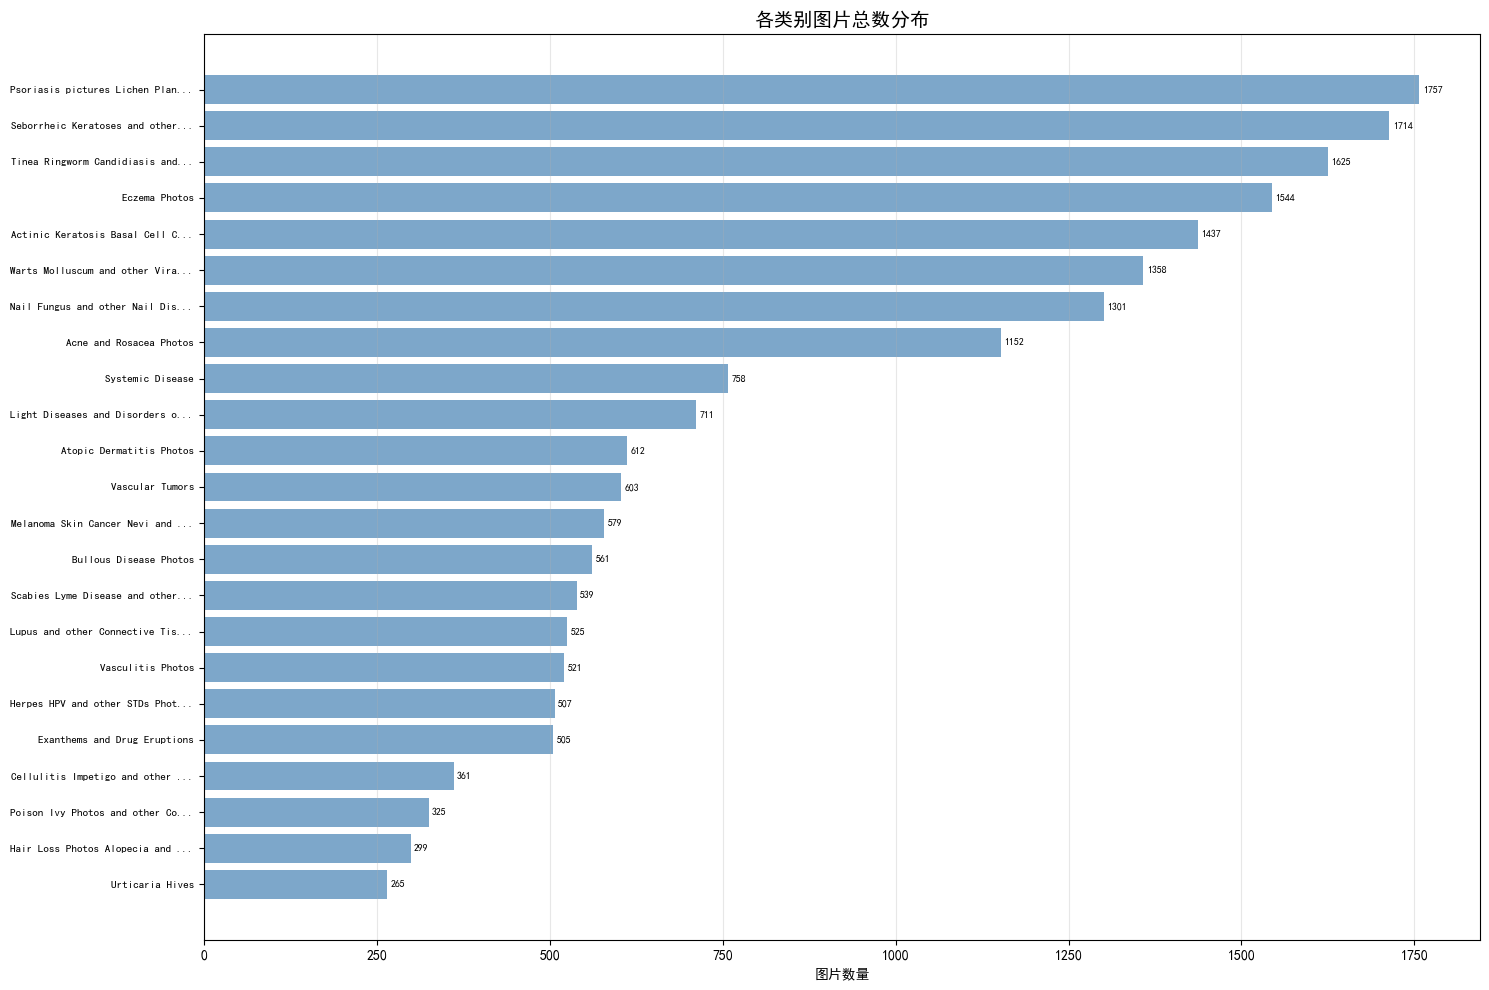

In [29]:
# 图表1: 各类别图片总数柱状图
plt.figure(figsize=(15, 10))
df_sorted = df.sort_values('Total', ascending=True)
y_pos = np.arange(len(df_sorted))
bars = plt.barh(y_pos, df_sorted['Total'], color='steelblue', alpha=0.7)
plt.yticks(y_pos)
plt.gca().set_yticklabels([cat[:30] + '...' if len(cat) > 30 else cat for cat in df_sorted['Category']], fontsize=8)
plt.xlabel('图片数量')
plt.title('各类别图片总数分布', fontsize=14, weight='bold')
plt.grid(axis='x', alpha=0.3)

# 添加数值标签
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontsize=7)

plt.tight_layout()
plt.show()

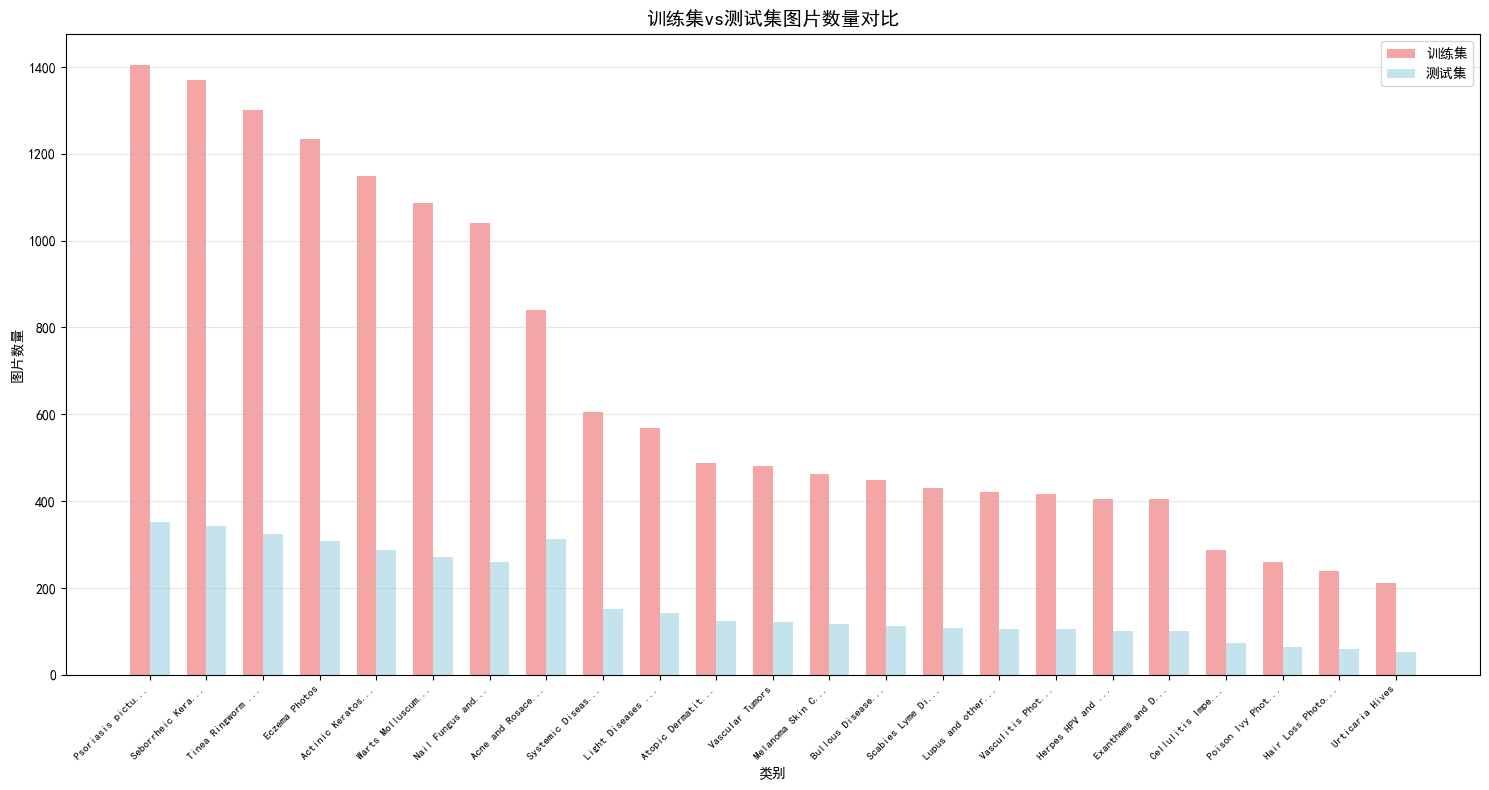

In [30]:
# 图表2: 训练集vs测试集对比
plt.figure(figsize=(15, 8))
x = np.arange(len(df))
width = 0.35
plt.bar(x - width/2, df['Train'], width, label='训练集', color='lightcoral', alpha=0.7)
plt.bar(x + width/2, df['Test'], width, label='测试集', color='lightblue', alpha=0.7)
plt.xlabel('类别')
plt.ylabel('图片数量')
plt.title('训练集vs测试集图片数量对比', fontsize=14, weight='bold')
plt.xticks(x)
plt.gca().set_xticklabels([cat[:15] + '...' if len(cat) > 15 else cat for cat in df['Category']], 
                         rotation=45, ha='right', fontsize=8)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# def show_sample_images(data_dir, categories, num_categories=6, num_images_per_category=4):
#     """显示数据集中的示例图片"""
#     # 随机选择一些类别进行展示
#     selected_categories = random.sample(categories, min(num_categories, len(categories)))
    
#     fig, axes = plt.subplots(num_categories, num_images_per_category, 
#                            figsize=(num_images_per_category*3, num_categories*3))
    
#     if num_categories == 1:
#         axes = axes.reshape(1, -1)
    
#     for i, category in enumerate(selected_categories):
#         category_path = os.path.join(data_dir, category)
        
#         # 获取该类别下的所有图片
#         image_files = [f for f in os.listdir(category_path) 
#                       if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'))]
        
#         # 随机选择几张图片
#         if len(image_files) >= num_images_per_category:
#             selected_images = random.sample(image_files, num_images_per_category)
#         else:
#             selected_images = image_files
        
#         for j, img_file in enumerate(selected_images):
#             if j < num_images_per_category:
#                 try:
#                     img_path = os.path.join(category_path, img_file)
#                     img = Image.open(img_path)
                    
#                     axes[i, j].imshow(img)
#                     axes[i, j].set_title(f'{img_file[:20]}...' if len(img_file) > 20 else img_file, 
#                                         fontsize=8)
#                     axes[i, j].axis('off')
#                 except Exception as e:
#                     axes[i, j].text(0.5, 0.5, '无法加载图片', ha='center', va='center')
#                     axes[i, j].axis('off')
        
#         # 如果图片不够，清空多余的子图
#         for j in range(len(selected_images), num_images_per_category):
#             axes[i, j].axis('off')
        
#         # 在左侧添加类别标签
#         axes[i, 0].set_ylabel(category[:30] + '...' if len(category) > 30 else category, 
#                              rotation=0, ha='right', va='center', fontsize=10, weight='bold')
    
#     plt.suptitle('数据集图片示例', fontsize=16, weight='bold')
#     plt.tight_layout()
#     plt.show()

# # 显示训练集示例图片
# print("\n=== 训练集图片示例 ===")
# if 'categories' in locals() and len(categories) > 0:
#     show_sample_images(train_dir, categories)